### Detailed Agentic RAG Implementation

In [96]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS


##### Langgraph documents retriever tool

In [97]:
urls=['https://docs.langchain.com/oss/python/langgraph/overview',
      'https://docs.langchain.com/oss/python/langgraph/workflows-agents',
      'https://docs.langchain.com/oss/python/langgraph/interrupts']


docs = WebBaseLoader(web_paths=urls).load()

docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'description': 'Gain control with LangGraph to design agents that reliably handle complex tasks', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartLocal serverChangelogThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureTestLangSmith StudioAgent Chat UILangSmith DeploymentLangSmith ObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageGain control with LangGraph to design 

In [98]:
chunks = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100).split_documents(docs)
print(f"Number of chunks: {len(chunks)}")

Number of chunks: 67


In [99]:
vectorstore = FAISS.from_documents(
    documents=chunks,
    embedding=HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
)

retriever = vectorstore.as_retriever()


In [100]:
retriever.invoke("Give me some rules of interrupt in langgraph")

[Document(id='d1b334c0-48ed-4127-9c89-4fd1a0bcf42a', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/interrupts', 'title': 'Interrupts - Docs by LangChain', 'language': 'en'}, page_content='called before interrupt must be idempotentUsing with subgraphs called as functionsDebugging with interruptsUsing LangGraph StudioCapabilitiesInterruptsCopy pageCopy pageInterrupts allow you to pause graph execution at specific points and wait for external input before continuing. This enables human-in-the-loop patterns where you need external input to proceed. When an interrupt is triggered, LangGraph saves the graph state using its persistence layer and waits indefinitely until you resume execution.'),
 Document(id='79d51845-f6f7-416d-81a6-794f118b680b', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/interrupts', 'title': 'Interrupts - Docs by LangChain', 'language': 'en'}, page_content='\u200bRules of interrupts\nWhen you call interrupt within a node, Lan

In [101]:
#creating retriever tool
# from langchain_core.tools import create_retriever_tool

# langgraph_tool = create_retriever_tool(
#     retriever=retriever,
#     name="langgraph retriever",
#     description="this tool retrieves relevant documents about langgraph based on query"
# )

from langchain.tools import tool
@tool
def langgraph_tool(query:str):
    "this function retrieves relevant documents about langgraph based on query"
    related_docs = retriever.invoke(query)
    return related_docs

#### Langchain documents retriever tool

In [102]:
lc_urls=['https://docs.langchain.com/oss/python/langchain/agents',
'https://docs.langchain.com/oss/python/langchain/tools',
'https://docs.langchain.com/oss/python/langchain/streaming']

lc_docs = WebBaseLoader(web_paths=lc_urls).load()
lc_docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langchain/agents', 'title': 'Agents - Docs by LangChain', 'language': 'en'}, page_content='Agents - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationCore componentsAgentsLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartChangelogPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingStructured outputMiddlewareOverviewBuilt-in middlewareCustom middlewareAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryAgent developmentLangSmith StudioTestAgent Chat UIDeploy with LangSmithDeploymentObservabilityOn this pageCore componentsModelStatic modelDynamic modelToolsDefining toolsTool error handlingTool use in the ReAct loopSystem promptDynamic system promptInvocationAdva

In [103]:
lc_chunks = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100).split_documents(lc_docs)
print(f"Number of langchain chunks: {len(lc_chunks)}")

Number of langchain chunks: 87


In [104]:
vectorstore = FAISS.from_documents(
    documents=lc_chunks,
    embedding=HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
)

lc_retriever = vectorstore.as_retriever()
lc_retriever.invoke("what's possible with langchain streaming?")


[Document(id='3d13870e-d38a-4814-9cc4-7278f763bf62', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/streaming', 'title': 'Streaming - Docs by LangChain', 'language': 'en'}, page_content='Streaming is crucial for enhancing the responsiveness of applications built on LLMs. By displaying output progressively, even before a complete response is ready, streaming significantly improves user experience (UX), particularly when dealing with the latency of LLMs.\n\u200bOverview\nLangChain’s streaming system lets you surface live feedback from agent runs to your application.\nWhat’s possible with LangChain streaming:'),
 Document(id='c6b07201-9726-4b28-900c-edd991503558', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/streaming', 'title': 'Streaming - Docs by LangChain', 'language': 'en'}, page_content='Streaming - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch

In [105]:
#creating retriever tool
# from langchain_core.tools import create_retriever_tool

# langchain_tool = create_retriever_tool(
#     retriever=lc_retriever,
#     name="langchain retriever",
#     description="this tool retrieves relevant documents about langchain based on query"
# )

# from langchain.tools import tool

@tool
def langchain_tool(query:str):
    "this function retrieves relevant documents about langchain based on query"
    related_lc_docs = lc_retriever.invoke(query)
    return related_lc_docs


#### Langgraph workflow

In [106]:
from typing import Annotated, Sequence, List, Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    messages : Annotated[Sequence, add_messages]
    grade: str
    
    


In [107]:
from langchain_groq import ChatGroq

model = ChatGroq(model='llama-3.1-8b-instant')
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000026BE48831D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000026BE4882B50>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [108]:
#defining nodes
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage, BaseMessage

 

agent_tool = create_agent(model=model, tools=[langchain_tool, langgraph_tool], debug=True)
def agent(state:AgentState):
    print("--CALL AGENT--")
    response = agent_tool.invoke({"messages":state['messages']})
    return {"messages": state['messages'] + [response['messages'][-1].content]}
   

In [109]:
#defining class for structured output
from typing import Literal
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

class Relevancy(TypedDict):
    score : Literal['yes', 'no']

#defining grader node

def grader(state:AgentState)-> Literal['generate', 'rewrite']:
    """This function grades the relevant documents fetched by agent and returns defined literals accordingly""" 
    context = state['messages'][-1].content
    user_query = state['messages'][0].content

    relevancy_grader_model = model.with_structured_output(Relevancy)

    prompt = PromptTemplate(
        input_variables=['context', 'user_query'],
        template='''you are the grader assessing relevance of a retrieved documents to a user question.
        here is the retrieved documents: \n\n {context}
        here is the user question: {user_query}
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant.
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
'''
    )

    grader_chain = ({"context": context, "user_query":user_query} |
                    prompt |
                    relevancy_grader_model |
                    StrOutputParser())
    
    relevancy_score = grader_chain.score
    return {"grade":relevancy_score}
    

def decider_func(state:AgentState):
    if state['grade']=="yes":
        print("--DOCS ARE RELEVANT, GENERATE CALLED--")
        return "generate"
    else:
        print("--DOCS ARE IRRELEVANT, REWRITE CALLED--")
        return "rewrite"


In [110]:
#defining generate node

def generate(state:AgentState):
    """This function generates response for user query based on the relevant documents provided"""
    print("--GENERATING ANSWER--")
    relevant_docs = state['messages'][-1].content
    user_query = state['messages'][0].content

    generate_prompt = PromptTemplate(
       template= '''Answer user question, only based on context information provided.
        context: {context}
        question: {user_query}''',
        input_variables=['context', 'user_query']

    )

    model=ChatGroq(model="llama-3.1-8b-instant")

    generate_chain = (

        generate_prompt |
        model |
        StrOutputParser()

    )

    answer = generate_chain.invoke({"context": relevant_docs, "user_query": user_query})

    return {"messages": [answer]}


In [111]:
#defining rewrite node

def rewrite(state:AgentState):
    '''This function rewrites the user query to produce better results'''
    print("--REWRITING QUERY--")
    user_query = state['messages'][0].content
    rewrite_prompt = PromptTemplate.from_template('''
    rewrite or enhance given user question to help retrieve documents in better way.
    user question: {user_query}
    enhanced query: ''')

    rewrite_chain = (rewrite_prompt | model | StrOutputParser())

    new_query = rewrite_chain.invoke({"user_query": user_query})

    return {"messages": new_query}



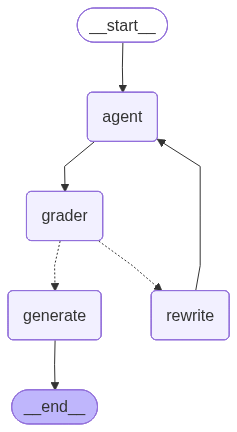

In [112]:
#defining graph workflow
graph = StateGraph(AgentState)

graph.add_node("agent", agent)
graph.add_node("grader", grader)
graph.add_node("generate", generate )
graph.add_node("rewrite", rewrite)

graph.add_edge(START, "agent")
graph.add_edge("agent", "grader")
graph.add_conditional_edges("grader", decider_func, {"generate": "generate", "rewrite": "rewrite"})
graph.add_edge("generate", END)
graph.add_edge("rewrite", "agent")

graph_builder = graph.compile()
graph_builder

In [113]:
response=graph_builder.invoke({"messages":"what's streaming in langchain?"})
response

--CALL AGENT--
[values] {'messages': [HumanMessage(content="what's streaming in langchain?", additional_kwargs={}, response_metadata={}, id='dcffc974-ff3b-47db-bcbc-31566510aa06')]}
[updates] {'model': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wt6q2beae', 'function': {'arguments': '{"query":"langchain streaming"}', 'name': 'langchain_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 294, 'total_tokens': 312, 'completion_time': 0.024793706, 'completion_tokens_details': None, 'prompt_time': 0.017249984, 'prompt_tokens_details': None, 'queue_time': 0.056715695, 'total_time': 0.04204369}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b4dcc-6530-7b42-bc47-006df5241778-0', tool_calls=[{'name': 'langchain_tool', 'args': {'query': 'langchain streaming'}

TypeError: Expected a Runnable, callable or dict.Instead got an unsupported type: <class 'str'>

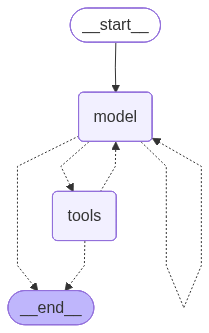

In [ ]:
agent